# Isomap Dimensionality Reduction on Facial Data


### DSCI 475 - Topological Data Analysis Final Project

Data Source: https://www.kaggle.com/datasets/juniorbueno/rating-opencv-emotion-images?resource=download

In [16]:
# Importing packages
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
from sklearn import manifold # dimensionality reduction
import imageio # reading images
import glob # file handling
import math # math functions

In [17]:
# Faces data
emotionFolders = glob.glob('images/train/*') # finding all folders
emotionFolders = [x + '/*.jpg' for x in emotionFolders] # getting all .jpg images
emotions = [x.split('/')[-2] for x in emotionFolders] # getting all emotions
print(len(emotions),  'emotions found')
print("Emotions: ", emotions)
path = 'images/train/'
# print(emotionFolders)

7 emotions found
Emotions:  ['Happy', 'Sad', 'Fear', 'Surprise', 'Neutral', 'Angry', 'Disgust']


In [18]:
# importing data

num_images_per_emotion = 30
samples = [] # samples

for folder in emotionFolders: # for each folder
    print(folder)
    imageNum = 0
    for filename in glob.glob(folder): # for each image
        imageNum += 1
        img = imageio.imread(filename) # read image
        samples.append(img.reshape(-1)) # add image to samples
        if imageNum == num_images_per_emotion:
            break

images/train/Happy/*.jpg
images/train/Sad/*.jpg
images/train/Fear/*.jpg
images/train/Surprise/*.jpg
images/train/Neutral/*.jpg
images/train/Angry/*.jpg
images/train/Disgust/*.jpg


/var/folders/4q/h6mrxg6x5tn0mwqnw8_b8jtr0000gn/T/ipykernel_43774/3094497468.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename) # read image


In [19]:
print("Number of images: ", len(samples))

Number of images:  210


In [20]:
samples

[array([63, 79, 67, ...,  0,  3,  4], dtype=uint8),
 array([11,  9,  9, ...,  4,  8,  6], dtype=uint8),
 array([247, 242, 247, ..., 133, 157, 167], dtype=uint8),
 array([22, 19, 23, ..., 88, 71, 66], dtype=uint8),
 array([180, 163,  83, ...,  16,  56,  50], dtype=uint8),
 array([ 68, 145, 182, ...,  87,  92,  88], dtype=uint8),
 array([ 59, 149, 184, ..., 101,  93,  90], dtype=uint8),
 array([ 92, 103, 109, ...,  70,  62,  74], dtype=uint8),
 array([112,  74,  78, ..., 123, 126, 122], dtype=uint8),
 array([ 22,  21,  23, ..., 175, 156, 162], dtype=uint8),
 array([26, 24, 38, ..., 42, 35, 35], dtype=uint8),
 array([232, 236, 233, ...,  65,  70,  82], dtype=uint8),
 array([ 0,  0,  6, ..., 35, 35, 37], dtype=uint8),
 array([ 93, 106,  91, ...,  21,  10,  15], dtype=uint8),
 array([ 93, 109, 117, ...,  19,  26,  39], dtype=uint8),
 array([115, 110, 113, ...,  82, 102,  99], dtype=uint8),
 array([1, 0, 1, ..., 9, 9, 9], dtype=uint8),
 array([118, 110, 120, ..., 187, 160, 126], dtype=uint8)

In [21]:
df = pd.DataFrame.from_records(samples, coerce_float=True) # create dataframe
num_images, num_pixels = df.shape # get shape
pixels_per_dimension = int(math.sqrt(num_pixels)) # get pixels per dimension

In [22]:
iso = manifold.Isomap(n_neighbors=5, n_components=2) # create isomap
iso.fit(df) # fit model
manifold_2Da = iso.transform(df) # transform data
manifold_2D = pd.DataFrame(manifold_2Da, columns=['component1', 'component2']) # create dataframe
manifold_2D.head()

,component1,component2
0,-4295.360653,85.955153
1,-7769.601213,-2814.552014
2,-4261.396284,4265.682288
3,-353.819129,4610.699620
4,-1091.702905,571.450663


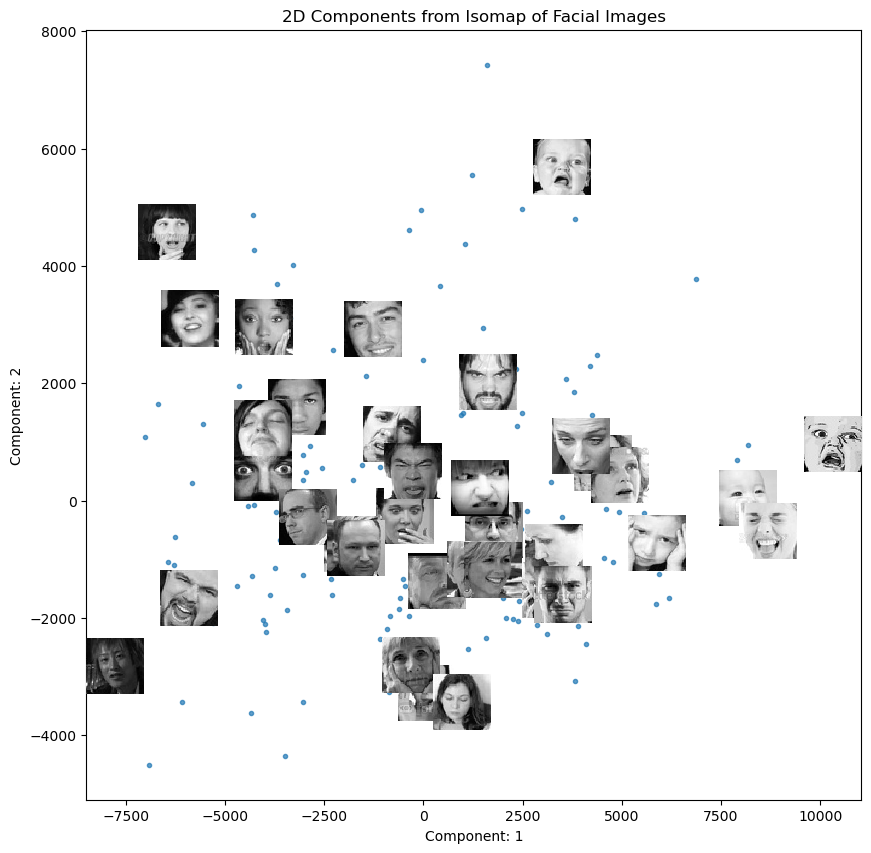

In [23]:
%matplotlib inline
np.random.seed(42)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['component1']) - min(manifold_2D['component1'])) * 0.08
y_size = (max(manifold_2D['component2']) - min(manifold_2D['component2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'component1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'component2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'component1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'component2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['component1'], manifold_2D['component2'], marker='.',alpha=0.7)
plt.show()